In [1]:
# data analysis
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use("seaborn-poster")

[**Pandas**](http://pandas.pydata.org/) - программный пакет, написанный на языке Python и предназначеный для анализа данных. Пакет дает возможность строить сводные таблицы, выполнять группировки, предоставляет удобный доступ к табличным данным. Основными структурами представления данных в Pandas являются Series и DataFrame.

**_Series_** – это проиндексированный одномерный массив значений. Он похож на простой словарь типа dict, где имя элемента будет соответствовать индексу, а значение – значению записи.<br>
**_DataFrame_** — это проиндексированный многомерный массив значений, соответственно каждый столбец DataFrame, является структурой Series. Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.
![pandas dataframe](./img/pandas.png)


[**Matplotlib**](http://matplotlib.org/) и [**Seaborn**](https://seaborn.pydata.org/) - библиотеки для визуального представления информации. 
У Pandas в связке с библиотеками Matplotlib и Seaborn появляется возможность удобного визуального анализа табличных данных.

### Series

**Создание объекта Series**

In [2]:
# создание простой Series
my_series = pd.Series([5, 6, 7, 8, 9, 10])
my_series

0     5
1     6
2     7
3     8
4     9
5    10
dtype: int64

In [3]:
# создание Series с именованным индексом
my_series2 = pd.Series([5, 6, 7, 8, 9, 10], index=['a', 'b', 'c', 'd', 'e', 'f'])
my_series2

a     5
b     6
c     7
d     8
e     9
f    10
dtype: int64

In [4]:
# создание Series с именованным индексом. здесь для каждой строки сразу задается имя индекса и значение.
my_series3 = pd.Series({'a': 5, 'b': 6, 'c': 7, 'd': 8})
my_series3

a    5
b    6
c    7
d    8
dtype: int64

** Доступ к элементам Series**

In [5]:
my_series.index

RangeIndex(start=0, stop=6, step=1)

In [6]:
my_series.values

array([ 5,  6,  7,  8,  9, 10], dtype=int64)

Получение элемента по индексу

In [7]:
my_series[4]

9

In [8]:
# получение нескольких элементов по индексу
my_series[[1,4,7]]
# стоит обратить внимание что по 7 индексу значений в этой Series не было.

1    6.0
4    9.0
7    NaN
dtype: float64

In [9]:
# переименование названия колонки индексов и колонки значений
my_series3.name = 'numbers'
my_series3.index.name = 'letters'
my_series3

letters
a    5
b    6
c    7
d    8
Name: numbers, dtype: int64

Переименование индексов

In [10]:
my_series3.index = ['A', 'B', 'C', 'D']
my_series3

A    5
B    6
C    7
D    8
Name: numbers, dtype: int64

In [11]:
print(my_series3['B'] == my_series3.B)
my_series3['B']

True


6

выборка по нескольким именнованным индексам

In [12]:
my_series2[['a', 'b', 'f']]

a     5
b     6
f    10
dtype: int64

Присвоение новых значений для индексов

In [13]:
my_series2[['a', 'b', 'f']] = 110
my_series2

a    110
b    110
c      7
d      8
e      9
f    110
dtype: int64

Фильтрация строк по условию

In [14]:
my_series2[my_series2 > 50]

a    110
b    110
f    110
dtype: int64

In [15]:
print(my_series3)
my_series3.drop(axis=0,labels=['A'],inplace=True)
my_series3

A    5
B    6
C    7
D    8
Name: numbers, dtype: int64


B    6
C    7
D    8
Name: numbers, dtype: int64

### DataFrame

**Создание и изменение**

объект DataFrame можно создать из массива, массива numpyь из словаря элементов, с указанием названия строк и столбцов или без указания

In [16]:
df0 = pd.DataFrame([17.04, 143.5, 9.5, 45.5])
df0

,0
0,17.04
1,143.50
2,9.50
3,45.50


In [17]:
df = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
    'population': [17.04, 143.5, 9.5, 45.5],
    'square': [2724902, 17125191, 207600, 603628]
})
df

,country,population,square
0,Kazakhstan,17.04,2724902
1,Russia,143.50,17125191
2,Belarus,9.50,207600
3,Ukraine,45.50,603628


In [18]:
df1 = pd.DataFrame(np.random.randn(4,3), 
                   index=['a', 'b', 'c', 'd'], 
                   columns=['c1', 'c2', 'c3'])
df1

,c1,c2,c3
a,0.332075,0.540343,0.311364
b,-1.080115,-0.988780,-0.679599
c,1.350595,-0.954323,-0.869521
d,2.414897,0.641294,-0.117544


In [19]:
df2 = pd.DataFrame({'A': np.random.random(4), 
                    'B': ['a', 'b', 'c', 'd',], 
                    'C': np.arange(4) > 2})
df2

,A,B,C
0,0.557690,a,False
1,0.999329,b,False
2,0.026426,c,False
3,0.083966,d,True


Обращение к элементам фрейма

In [20]:
df['country']

0    Kazakhstan
1        Russia
2       Belarus
3       Ukraine
Name: country, dtype: object

Стоит заметить что тип колонки это Series

In [21]:
type(df['country'])

pandas.core.series.Series

In [22]:
df.columns

Index(['country', 'population', 'square'], dtype='object')

In [23]:
df = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
    'population': [17.04, 143.5, 9.5, 45.5],
    'square': [2724902, 17125191, 207600, 603628]
}, index=['KZ', 'RU', 'BY', 'UA'])
df

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [24]:
df.loc['KZ']

country       Kazakhstan
population         17.04
square           2724902
Name: KZ, dtype: object

In [25]:
df.iloc[0]

country       Kazakhstan
population         17.04
square           2724902
Name: KZ, dtype: object

In [26]:
print(df.loc[['KZ', 'RU'], 'population'])
print(df.loc[['KZ', 'RU'], ['country', 'square']])

KZ     17.04
RU    143.50
Name: population, dtype: float64
       country    square
KZ  Kazakhstan   2724902
RU      Russia  17125191


In [27]:
print('Элетмент c индексом "KZ", колонки population равен ', df.at["KZ", 'population'], '\n')

Элетмент c индексом "KZ", колонки population равен  17.04 



Операции с элементами

In [28]:
#нотацию словарей Python
df[df.population > 10][['country', 'square']]

,country,square
KZ,Kazakhstan,2724902
RU,Russia,17125191
UA,Ukraine,603628


In [29]:
df.at["RU", 'square'] = 10**3
df

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,1000
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [30]:
df.loc['RU'] = ["Russia", 193.45,17125191]
df

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,193.45,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


Добавление новой колонки

In [31]:
type(df['population'] / df['square'] * 1000000)

pandas.core.series.Series

In [32]:
df['density'] = df['population'] / df['square'] * 1000000
df

,country,population,square,density
KZ,Kazakhstan,17.04,2724902,6.253436
RU,Russia,193.45,17125191,11.296224
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


Удаление колонки

In [33]:
df.drop(['density'], axis='columns') # axis = 1

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,193.45,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


Операция drop без параметра inplace не изменяет исходый фрейм, а возвращает новый с удалеными элементами

In [34]:
df

,country,population,square,density
KZ,Kazakhstan,17.04,2724902,6.253436
RU,Russia,193.45,17125191,11.296224
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


Обьединение двух DataFrame

In [35]:
df4=df2.append(df)
df4

,A,B,C,country,density,population,square
0,0.557690,a,False,NaN,NaN,NaN,NaN
1,0.999329,b,False,NaN,NaN,NaN,NaN
2,0.026426,c,False,NaN,NaN,NaN,NaN
3,0.083966,d,True,NaN,NaN,NaN,NaN
KZ,NaN,NaN,NaN,Kazakhstan,6.253436,17.04,2724902.0
RU,NaN,NaN,NaN,Russia,11.296224,193.45,17125191.0
BY,NaN,NaN,NaN,Belarus,45.761079,9.50,207600.0
UA,NaN,NaN,NaN,Ukraine,75.377550,45.50,603628.0


Обработка nan значений

In [36]:
pd.isnull(df4)

,A,B,C,country,density,population,square
0,False,False,False,True,True,True,True
1,False,False,False,True,True,True,True
2,False,False,False,True,True,True,True
3,False,False,False,True,True,True,True
KZ,True,True,True,False,False,False,False
RU,True,True,True,False,False,False,False
BY,True,True,True,False,False,False,False
UA,True,True,True,False,False,False,False


In [37]:
df4.fillna(0,inplace=True)
df4

,A,B,C,country,density,population,square
0,0.557690,a,False,0,0.000000,0.00,0.0
1,0.999329,b,False,0,0.000000,0.00,0.0
2,0.026426,c,False,0,0.000000,0.00,0.0
3,0.083966,d,True,0,0.000000,0.00,0.0
KZ,0.000000,0,0,Kazakhstan,6.253436,17.04,2724902.0
RU,0.000000,0,0,Russia,11.296224,193.45,17125191.0
BY,0.000000,0,0,Belarus,45.761079,9.50,207600.0
UA,0.000000,0,0,Ukraine,75.377550,45.50,603628.0


In [38]:
df4.at[2, 'A'] = np.nan
df4.at[3, 'B'] = np.nan
df4.loc[1, 'C'] = np.nan
df4

,A,B,C,country,density,population,square
0,0.557690,a,False,0,0.000000,0.00,0.0
1,0.999329,b,NaN,0,0.000000,0.00,0.0
2,NaN,c,False,0,0.000000,0.00,0.0
3,0.083966,NaN,True,0,0.000000,0.00,0.0
KZ,0.000000,0,0,Kazakhstan,6.253436,17.04,2724902.0
RU,0.000000,0,0,Russia,11.296224,193.45,17125191.0
BY,0.000000,0,0,Belarus,45.761079,9.50,207600.0
UA,0.000000,0,0,Ukraine,75.377550,45.50,603628.0


In [39]:
df4.dropna(axis=0)

,A,B,C,country,density,population,square
0,0.55769,a,False,0,0.000000,0.00,0.0
KZ,0.00000,0,0,Kazakhstan,6.253436,17.04,2724902.0
RU,0.00000,0,0,Russia,11.296224,193.45,17125191.0
BY,0.00000,0,0,Belarus,45.761079,9.50,207600.0
UA,0.00000,0,0,Ukraine,75.377550,45.50,603628.0


In [40]:
df4.dropna(axis=1)

,country,density,population,square
0,0,0.000000,0.00,0.0
1,0,0.000000,0.00,0.0
2,0,0.000000,0.00,0.0
3,0,0.000000,0.00,0.0
KZ,Kazakhstan,6.253436,17.04,2724902.0
RU,Russia,11.296224,193.45,17125191.0
BY,Belarus,45.761079,9.50,207600.0
UA,Ukraine,75.377550,45.50,603628.0


In [41]:
df4.dropna(how="any")

,A,B,C,country,density,population,square
0,0.55769,a,False,0,0.000000,0.00,0.0
KZ,0.00000,0,0,Kazakhstan,6.253436,17.04,2724902.0
RU,0.00000,0,0,Russia,11.296224,193.45,17125191.0
BY,0.00000,0,0,Belarus,45.761079,9.50,207600.0
UA,0.00000,0,0,Ukraine,75.377550,45.50,603628.0


**Чтение и запись данных**

Однако на практике DataFrame необходимо считать из некоторого файла.

описание dataset https://www.kaggle.com/gregorut/videogamesales

In [42]:
#много что умеет читать pd.read
#df2 = pd.read_csv('https://git.epam.com/anton_mushin/ml-course/blob/master/data/video_games_sales.csv')
df2 = pd.read_csv('../../data/video_games_sales.csv')
df2

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


Данные порой нужно не только считывать но и записывать.

In [43]:
df.to_csv('../../data/filename.csv')

In [44]:
!more ..\..\data\filename.csv

,country,population,square,density
KZ,Kazakhstan,17.04,2724902,6.253435903382948
RU,Russia,193.45,17125191,11.296224374957337
BY,Belarus,9.5,207600,45.761078998073216
UA,Ukraine,45.5,603628,75.37755041184305


In [45]:
%%cmd
more ..\..\data\filename.csv

Microsoft Windows [Version 6.1.7601]
Copyright (c) 2009 Microsoft Corporation.  All rights reserved.

(C:\tools\anaconda) D:\projects\ml-course\notebooks\lesson_1>more ..\..\data\filename.csv
,country,population,square,density
KZ,Kazakhstan,17.04,2724902,6.253435903382948
RU,Russia,193.45,17125191,11.296224374957337
BY,Belarus,9.5,207600,45.761078998073216
UA,Ukraine,45.5,603628,75.37755041184305

(C:\tools\anaconda) D:\projects\ml-course\notebooks\lesson_1>

In [46]:
df = pd.read_csv('../../data/filename.csv',sep=',',index_col=0)
df

,country,population,square,density
KZ,Kazakhstan,17.04,2724902,6.253436
RU,Russia,193.45,17125191,11.296224
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


## Обзор данных

In [47]:
df = pd.read_csv('../../data/video_games_sales.csv')

Посмотрим на размерность данных и названия колонок в фрейме

In [48]:
print(df.columns.values)
print(df.shape)

['Name' 'Platform' 'Year_of_Release' 'Genre' 'Publisher' 'NA_Sales'
 'EU_Sales' 'JP_Sales' 'Other_Sales' 'Global_Sales' 'Critic_Score'
 'Critic_Count' 'User_Score' 'User_Count' 'Developer' 'Rating']
(16719, 16)


При работе с данными бывает удобно посмотреть только на небольшие части - начало или конец файла.

In [49]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


Метод describe показывает основные статистические характеристики данных по каждому признаку: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [51]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [52]:
df['JP_Sales'].describe()

count    16719.000000
mean         0.077602
std          0.308818
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [54]:
df.describe(exclude=['O'])

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


DataFrame можно отсортировать по значению какого-нибудь из признаков.

In [55]:
df.sort_values(by='Name', ascending = False).head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
9135,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,0.00,0.00,0.14,0.00,0.14,NaN,NaN,NaN,NaN,NaN,NaN
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df.sort_values(by=['Name', 'Platform'], ascending=[True, False]).head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14985,Beyblade Burst,3DS,2016.0,Role-Playing,FuRyu,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN
1079,Fire Emblem Fates,3DS,2015.0,Role-Playing,Nintendo,0.81,0.23,0.52,0.11,1.68,NaN,NaN,NaN,NaN,NaN,NaN


**Операции со значениями**

Индексация и извлечение

In [57]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [58]:
df[df["Platform"]=='Wii'].head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E


In [59]:
df[(df['JP_Sales'] >3.5) & 
   (df['Platform'] == 'Wii')].head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
13,Wii Fit,Wii,2007.0,Sports,Nintendo,8.92,8.03,3.60,2.15,22.70,80.0,63.0,7.7,146.0,Nintendo,E


Какой средний объем продаж в Японии

In [60]:
df['JP_Sales'].mean()

0.07760212931394815

Применение функции к каждому столбцу

In [61]:
df[['JP_Sales','EU_Sales','Global_Sales']].apply(np.mean)

JP_Sales        0.077602
EU_Sales        0.145025
Global_Sales    0.533543
dtype: float64

## Группировка и агрегация данных

In [62]:
df[['Platform','Global_Sales']].head()

,Platform,Global_Sales
0,Wii,82.53
1,NES,40.24
2,Wii,35.52
3,Wii,32.77
4,GB,31.37


In [63]:
df2=df[df['Platform'].isin(["PS3",'PS4',"Wii",'X360'])]
df2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E


In [64]:
g = df2[['Platform','Global_Sales']].groupby('Platform')
g

In [65]:
d1 = g.get_group("Wii")
d1

,Platform,Global_Sales
0,Wii,82.53
2,Wii,35.52
3,Wii,32.77
7,Wii,28.92
8,Wii,28.32
13,Wii,22.70
15,Wii,21.79
39,Wii,12.84
49,Wii,11.35
61,Wii,10.12


In [66]:
df2[['Platform','Global_Sales']].groupby('Platform').sum()

,Global_Sales
Platform,
PS3,939.43
PS4,314.23
Wii,908.13
X360,971.63


In [67]:
df2[['Platform','Global_Sales']].groupby('Platform').sum().sort_values(by='Global_Sales',ascending=False)

,Global_Sales
Platform,
X360,971.63
PS3,939.43
Wii,908.13
PS4,314.23


In [68]:
df2[['Platform','Global_Sales']].groupby('Platform').sum().loc['PS4']

Global_Sales    314.23
Name: PS4, dtype: float64

In [69]:
df2[['Platform','Year_of_Release','Global_Sales']].groupby(['Platform','Year_of_Release']).sum()

Global_Sales
Platform Year_of_Release              
PS3      2006.0                  20.95
         2007.0                  73.14
         2008.0                 118.48
         2009.0                 130.89
         2010.0                 142.38
         2011.0                 156.79
         2012.0                 107.27
         2013.0                 113.17
         2014.0                  47.63
         2015.0                  16.87
         2016.0                   3.58
PS4      2013.0                  25.97
         2014.0                  99.97
         2015.0                 118.96
         2016.0                  69.29
         2017.0                   0.04
Wii      2006.0                 137.12
         2007.0                 152.89
         2008.0                 171.45
         2009.0                 207.08
         2010.0                 128.18
         2011.0                  59.64
         2012.0                  21.71
         2013.0                   8.60
         2014.0                   3.75
         2015.0                   1.14
         2016.0                   0.18
X360     2005.0                   8.27
         2006.0                  51.66
         2007.0                  95.43
         2008.0                 135.25
         2009.0                 120.28
         2010.0                 170.08
         2011.0                 143.94
         2012.0                  99.65
         2013.0                  88.58
         2014.0                  34.78
         2015.0                  11.95
         2016.0                   1.52

In [70]:
df2[['Platform','Year_of_Release','Global_Sales']].groupby(['Platform','Year_of_Release']).agg(['min', 'max','sum','mean'])

Global_Sales                         
                                  min    max     sum      mean
Platform Year_of_Release                                      
PS3      2006.0                  0.01   4.34   20.95  0.775926
         2007.0                  0.02   6.68   73.14  0.812667
         2008.0                  0.01  10.50  118.48  0.858551
         2009.0                  0.01  10.60  130.89  0.807963
         2010.0                  0.02  12.63  142.38  0.786630
         2011.0                  0.01  13.32  156.79  0.729256
         2012.0                  0.01  13.79  107.27  0.724797
         2013.0                  0.01  21.04  113.17  0.898175
         2014.0                  0.01   5.26   47.63  0.441019
         2015.0                  0.01   2.71   16.87  0.231096
         2016.0                  0.01   0.73    3.58  0.094211
PS4      2013.0                  0.16   3.83   25.97  1.623125
         2014.0                  0.02  12.61   99.97  1.332933
         2015.0                  0.01  14.63  118.96  0.868321
         2016.0                  0.01   7.59   69.29  0.422500
         2017.0                  0.04   0.04    0.04  0.040000
Wii      2006.0                  0.02  82.53  137.12  3.116364
         2007.0                  0.01  22.70  152.89  0.826432
         2008.0                  0.01  35.52  171.45  0.607979
         2009.0                  0.01  32.77  207.08  0.637169
         2010.0                  0.01   9.44  128.18  0.506640
         2011.0                  0.01  10.12   59.64  0.417063
         2012.0                  0.01   6.76   21.71  0.700323
         2013.0                  0.02   3.59    8.60  0.716667
         2014.0                  0.01   2.01    3.75  0.625000
         2015.0                  0.01   0.95    1.14  0.285000
         2016.0                  0.18   0.18    0.18  0.180000
X360     2005.0                  0.01   2.03    8.27  0.459444
         2006.0                  0.01   6.09   51.66  0.555484
         2007.0                  0.01  12.12   95.43  0.775854
         2008.0                  0.01  11.01  135.25  0.926370
         2009.0                  0.01  13.47  120.28  0.699302
         2010.0                  0.01  21.81  170.08  0.934505
         2011.0                  0.01  14.73  143.94  0.698738
         2012.0                  0.01  13.67   99.65  0.940094
         2013.0                  0.01  16.27   88.58  1.181067
         2014.0                  0.01   4.29   34.78  0.552063
         2015.0                  0.01   1.71   11.95  0.341429
         2016.0                  0.02   0.38    1.52  0.116923

In [71]:
yearlySales = df2.groupby(['Year_of_Release','Platform'])['Global_Sales'].sum()
yearlySales

Year_of_Release  Platform
2005.0           X360          8.27
2006.0           PS3          20.95
                 Wii         137.12
                 X360         51.66
2007.0           PS3          73.14
                 Wii         152.89
                 X360         95.43
2008.0           PS3         118.48
                 Wii         171.45
                 X360        135.25
2009.0           PS3         130.89
                 Wii         207.08
                 X360        120.28
2010.0           PS3         142.38
                 Wii         128.18
                 X360        170.08
2011.0           PS3         156.79
                 Wii          59.64
                 X360        143.94
2012.0           PS3         107.27
                 Wii          21.71
                 X360         99.65
2013.0           PS3         113.17
                 PS4          25.97
                 Wii           8.60
                 X360         88.58
2014.0           PS3          47.63
  

In [72]:
yearlySales.index

MultiIndex(levels=[[2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0], ['PS3', 'PS4', 'Wii', 'X360']],
           labels=[[0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12], [3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 1]],
           names=['Year_of_Release', 'Platform'])

In [73]:
yearlySales.unstack()

Platform,PS3,PS4,Wii,X360
Year_of_Release,,,,
2005.0,NaN,NaN,NaN,8.27
2006.0,20.95,NaN,137.12,51.66
2007.0,73.14,NaN,152.89,95.43
2008.0,118.48,NaN,171.45,135.25
2009.0,130.89,NaN,207.08,120.28
2010.0,142.38,NaN,128.18,170.08
2011.0,156.79,NaN,59.64,143.94
2012.0,107.27,NaN,21.71,99.65
2013.0,113.17,25.97,8.60,88.58


## Визуализация

In [74]:
# Dataframe contain info only on the 7th Gen consoles
df_7 = df[df['Platform'].isin(['Wii', 'PS3','X360'])]
print( df_7.shape)
df_7.columns

(3913, 16)


Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [75]:
df_7['Platform'].unique()

array(['Wii', 'X360', 'PS3'], dtype=object)

Метод scatter_matrix позволяет визуализировать попарные зависимости между признаками (а также распределение каждого признака на диагонали)

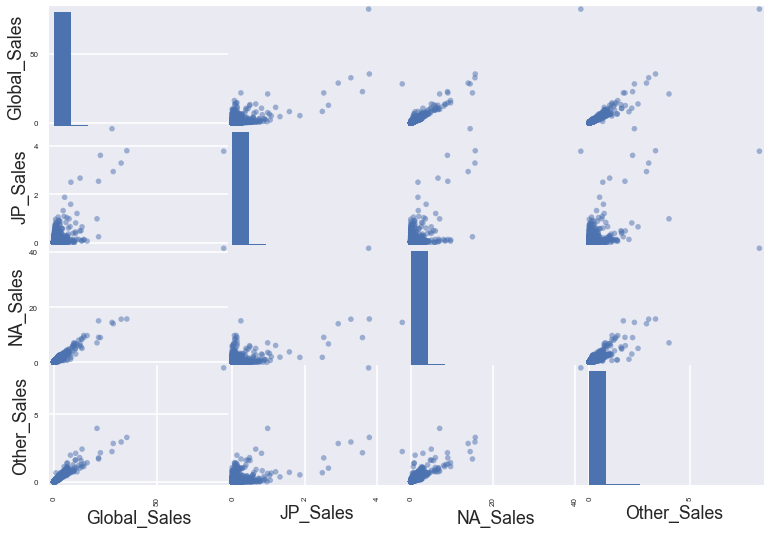

In [76]:
pd.plotting.scatter_matrix(df_7[['Global_Sales', 'JP_Sales', 'NA_Sales', 'Other_Sales']]);

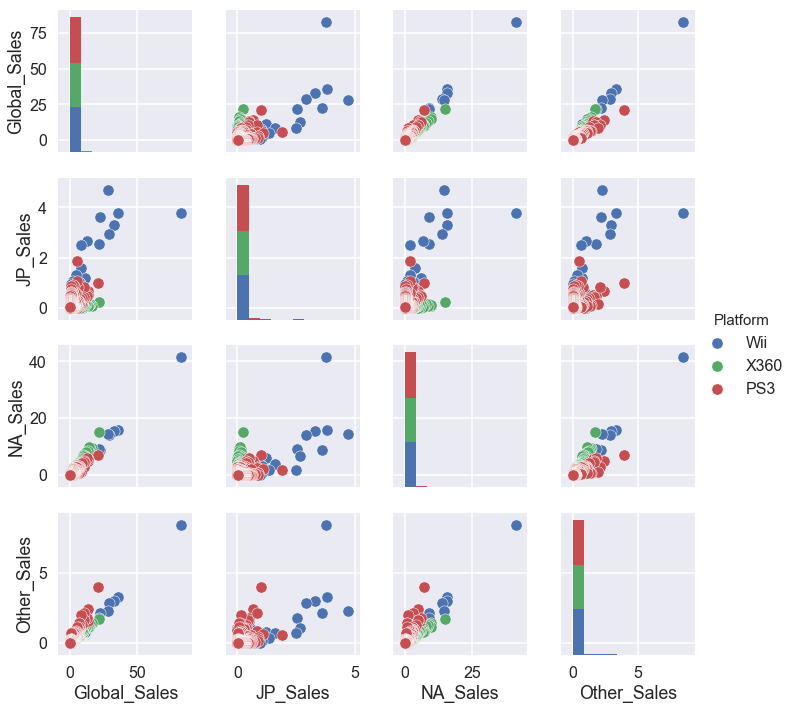

In [77]:
sns.pairplot(df_7[["Platform",'Global_Sales', 'JP_Sales', 'NA_Sales', 'Other_Sales']],hue="Platform");

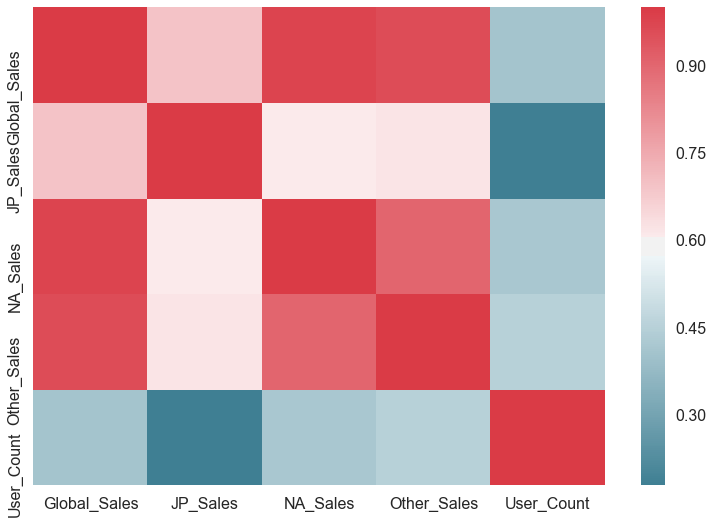

In [78]:
df_7_sales = df_7[['Global_Sales', 'JP_Sales', 'NA_Sales', 'Other_Sales',"User_Count"]]
corr = df_7_sales.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap);

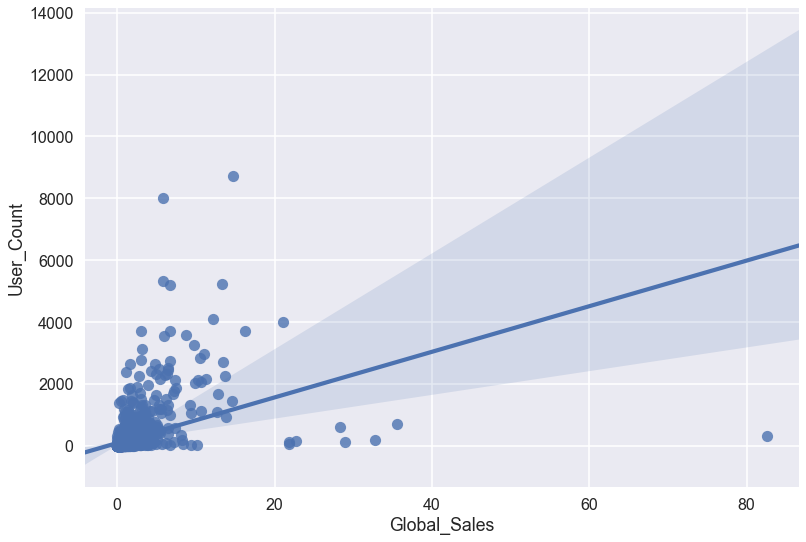

In [79]:
sns.regplot(x="Global_Sales", y="User_Count", data=df_7_sales);

In [80]:
df_7=df_7[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Global_Sales', 'User_Count', 'Developer', 'Rating']]

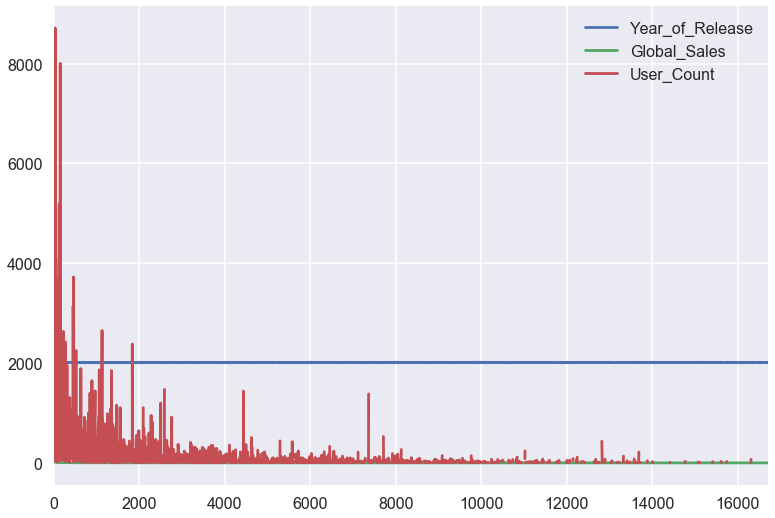

In [81]:
df_7.plot();

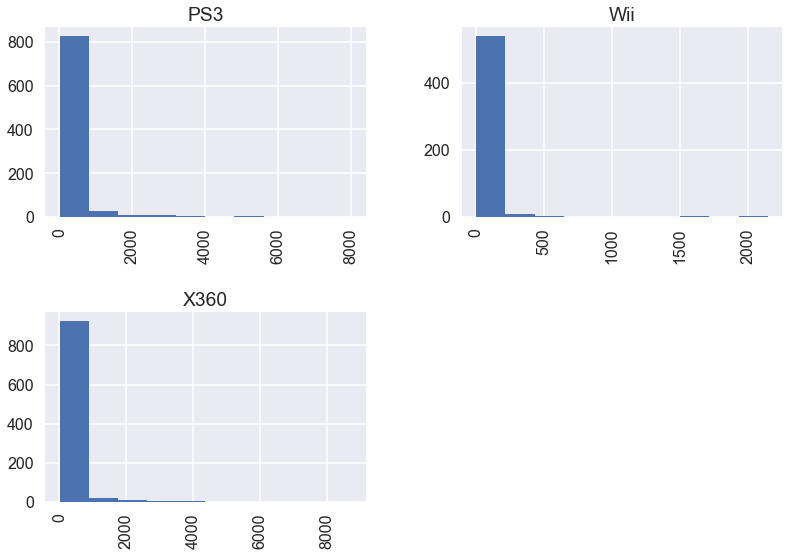

In [82]:
df_7[["Platform",'User_Count']].hist(by="Platform");

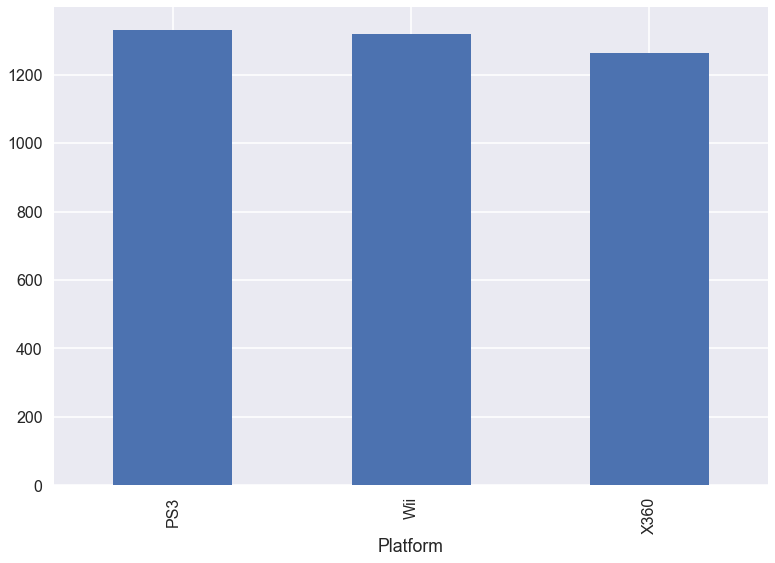

In [83]:
df_7.groupby('Platform')['Name'].count().plot(kind='bar');

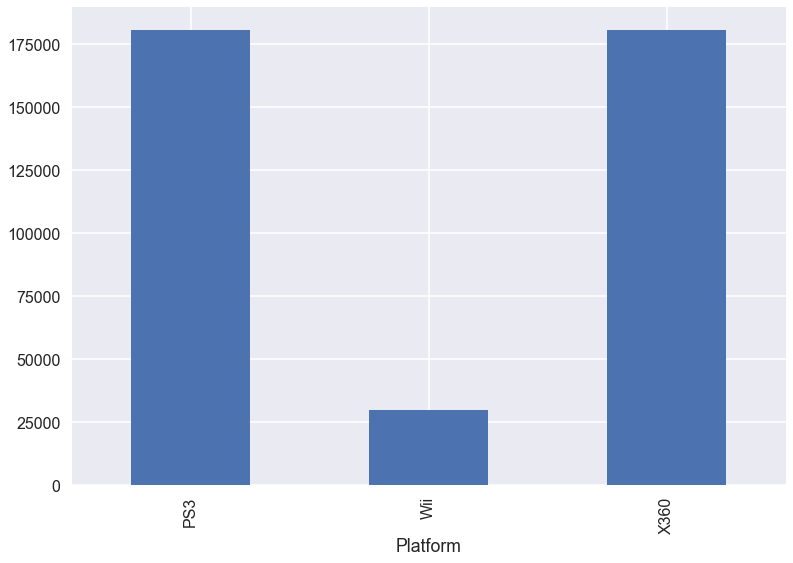

In [84]:
df_7.groupby('Platform')['User_Count'].sum().plot(kind='bar');

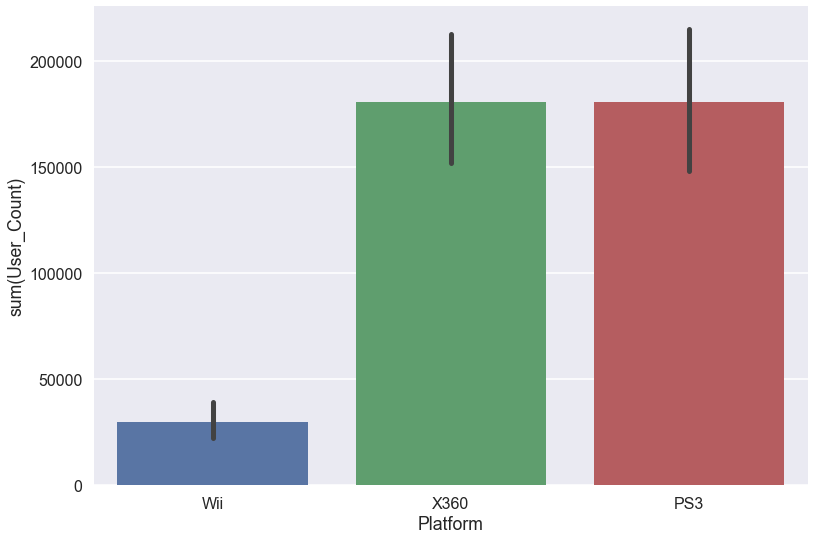

In [85]:
sns.barplot(x="Platform", y="User_Count", data=df_7,estimator=np.sum);

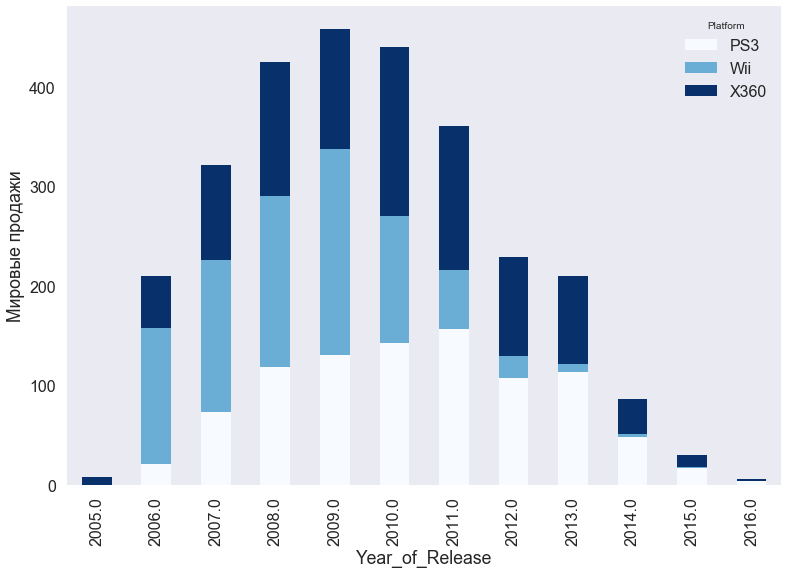

In [86]:
yearlySales = df_7.groupby(['Year_of_Release','Platform'])['Global_Sales'].sum()
yearlySales.unstack().plot(kind='bar',stacked=True, colormap= 'Blues',  grid=False)
plt.ylabel('Мировые продажи');

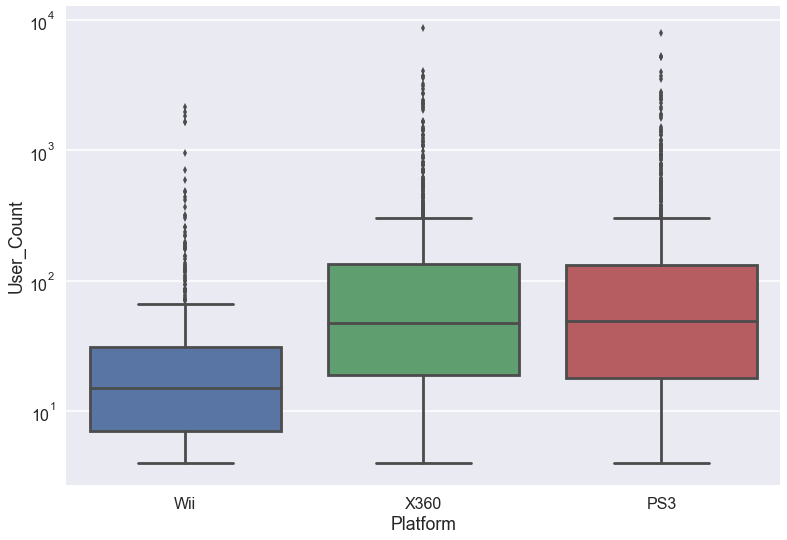

In [87]:
ax = sns.boxplot(x="Platform", y="User_Count", data=df_7)
ax.set_yscale('log')

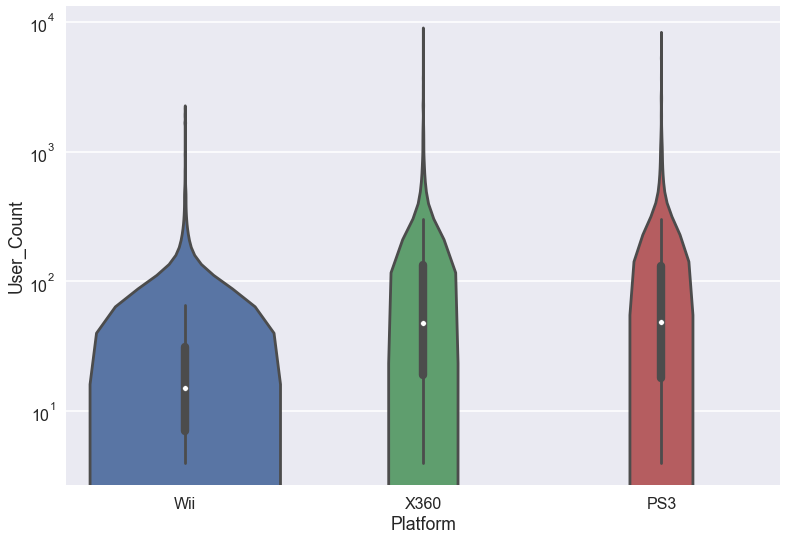

In [88]:
ax=sns.violinplot(x="Platform", y="User_Count", data=df_7)
ax.set_yscale('log')

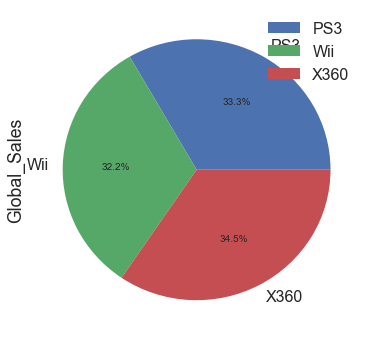

In [89]:
data= df_7[['Platform', 'Global_Sales']].groupby(['Platform'], as_index=False).sum()
data.sort_values(by='Global_Sales', ascending=False)
data.plot(figsize=(6,6), kind='pie',y='Global_Sales',labels=data['Platform'].unique(), autopct='%1.1f%%');

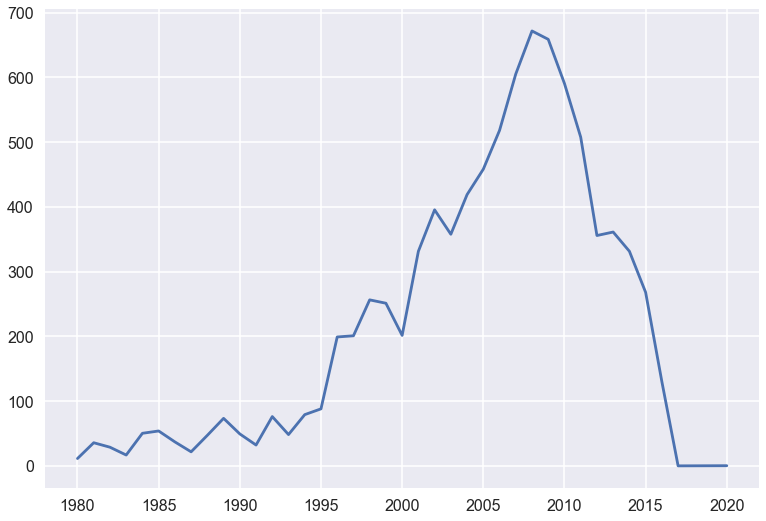

In [90]:
data=df[['Global_Sales',"Year_of_Release"]].groupby(["Year_of_Release"])['Global_Sales'].sum()
plt.plot(data.index.values, data.values, label = 'Global Sales');

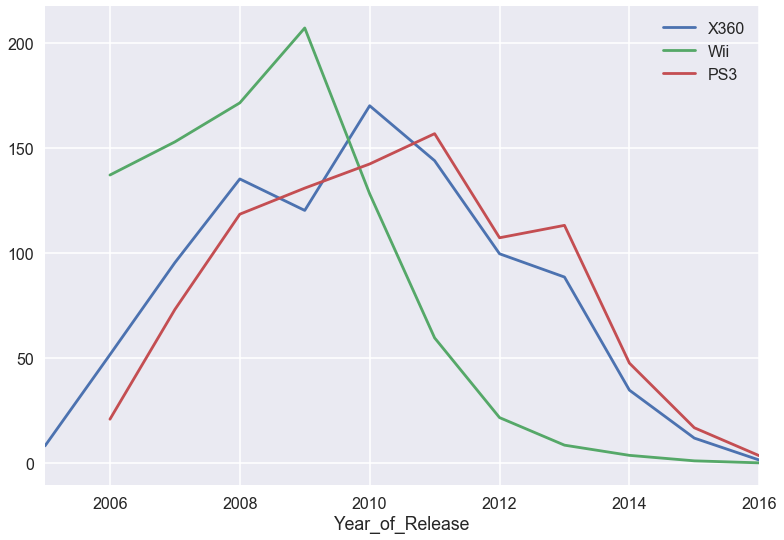

In [91]:
platforms=['X360','Wii','PS3']
data=df_7[['Platform', 'Global_Sales',"Year_of_Release"]].groupby(["Year_of_Release",'Platform'])['Global_Sales'].sum()
#data[data['Platform']=='Wii']
[data.loc[:,pl].plot(kind='line', x="Year_of_Release", y="Global_Sales",label=pl) for pl in platforms]
plt.legend();


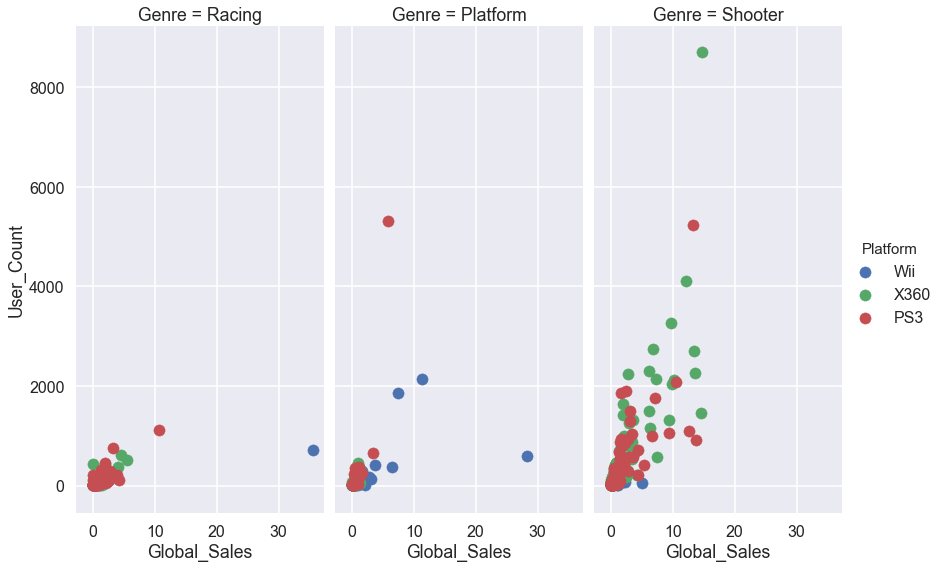

In [92]:
g = sns.FacetGrid(df_7[df_7['Genre'].isin(['Platform','Racing','Shooter'])], hue="Platform",col="Genre", size=8, aspect=.5)
g = (g.map(plt.scatter, "Global_Sales","User_Count").add_legend())
g;